In [ ]:
%%capture
%pip install -r requirements.txt

# Load the data

In [1]:
from customer_focus_churn_rfm import load_data

data = load_data()
data

data.columns

Index(['order_id', 'customer_id', 'store_id', 'product_id', 'direction',
       'gross_price', 'price_reduction', 'purchase_datetime', 'product_class',
       'address_id', 'birthdate', 'gender', 'job_type', 'email_provider',
       'flag_phone_provided', 'flag_privacy', 'postal_code', 'district',
       'region', 'account_id', 'favorite_store', 'loyalty_type',
       'loyatlty_status', 'activation_date'],
      dtype='object')

The last purchase date in the dataset is: 2023-04-30 21:11:41


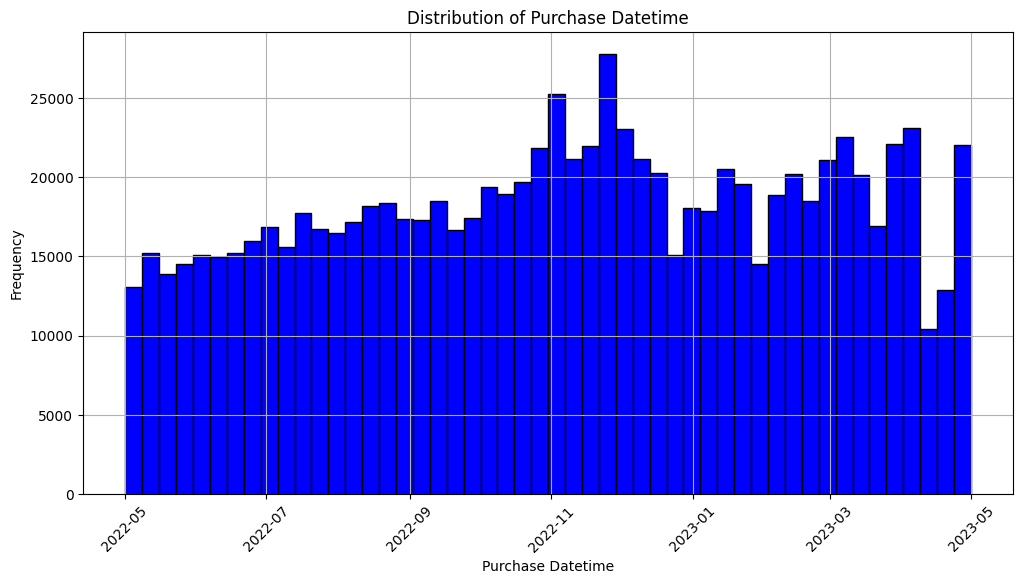

In [3]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert purchase_datetime to datetime if it's not already
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])
last_purchase_date = data['purchase_datetime'].max()
print(f"The last purchase date in the dataset is: {last_purchase_date}")

# Plot the purchase_datetime data
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_datetime'], bins=50, color='blue', edgecolor='black')
plt.title('Distribution of Purchase Datetime')
plt.xlabel('Purchase Datetime')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


/tmp/ipykernel_27769/1241266858.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)


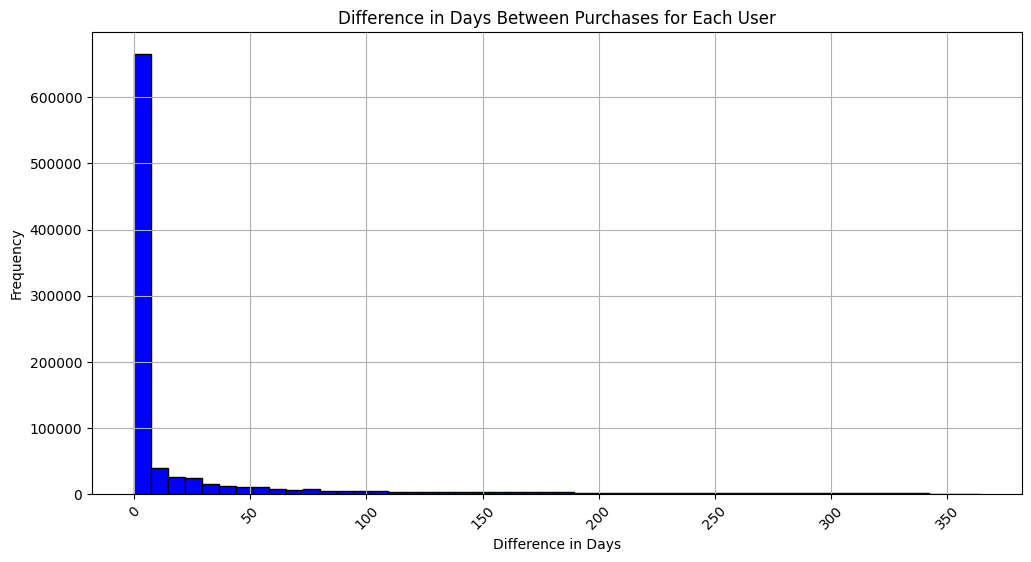

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure 'purchase_datetime' is in datetime format
data['purchase_datetime'] = pd.to_datetime(data['purchase_datetime'])

# Sort data by customer_id and purchase_datetime
data = data.sort_values(by=['customer_id', 'purchase_datetime'])

# Calculate the difference in days between consecutive purchases for each user
data['purchase_diff'] = data.groupby('customer_id')['purchase_datetime'].diff().dt.days

# Calculate the last day in the dataset
last_day = data['purchase_datetime'].max()

# Calculate the difference between the last purchase date and the last day in the dataset
last_purchase_diff = data.groupby('customer_id')['purchase_datetime'].max().apply(lambda x: (last_day - x).days)

# Merge the last purchase difference back to the original data
data = data.merge(last_purchase_diff.rename('last_purchase_diff'), on='customer_id')

# Fill NaN values in 'purchase_diff' with the 'last_purchase_diff'
data['purchase_diff'].fillna(data['last_purchase_diff'], inplace=True)

# Drop the 'last_purchase_diff' column as it's no longer needed
data.drop(columns=['last_purchase_diff'], inplace=True)

# Plot the differences using a histogram
plt.figure(figsize=(12, 6))
plt.hist(data['purchase_diff'], bins=50, color='blue', edgecolor='black')
plt.title('Difference in Days Between Purchases for Each User')
plt.xlabel('Difference in Days')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [16]:
# Filter rows where 'purchase_diff' is greater than 90 days
rows_with_large_diff = data[data['purchase_diff'] > 90]

# Display the filtered rows
rows_with_large_diff


,order_id,customer_id,store_id,product_id,direction,gross_price,price_reduction,purchase_datetime,product_class,address_id,...,flag_privacy,postal_code,district,region,account_id,favorite_store,loyalty_type,loyatlty_status,activation_date,purchase_diff
38,88b9dc81f8b601c78824ac62311a7eb4,30,49,35649740,1,3.10,0.31,2022-06-11 18:41:54,11,29,...,True,20028.0,MI,LOMBARDIA,351603,49,premium,1,2022-06-11,281.0
125,c14cd4c68ccabf1a47585bb4eced7ed4,60,49,35486626,1,49.98,0.00,2022-12-13 20:09:13,12,557043,...,True,21040.0,VA,LOMBARDIA,523699,1,standard,1,2022-09-13,138.0
127,54f1e18cc8825f7d2f40d0eafc833fe0,76,9,35411474,1,4.49,0.00,2023-03-08 19:23:27,11,73,...,True,62024.0,MC,MARCHE,222056,9,standard,1,2022-04-12,295.0
129,0bedd5ef545c4d82f2575f0263997a6b,86,15,33700716,1,0.20,0.00,2022-05-04 12:32:34,10,80,...,True,21019.0,VA,LOMBARDIA,152449,15,standard,1,2022-03-12,361.0
134,09d76e209b74b5d4ac16a1e8238f1189,95,49,30126292,1,1.55,0.00,2022-08-29 18:22:18,11,530831,...,False,21024.0,VA,LOMBARDIA,490641,49,business premium,1,2022-08-27,202.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
860329,474a3498ae085224526844047ff32573,798840,42,34345136,1,19.35,0.00,2023-01-29 15:47:00,14,782077,...,True,133.0,RM,LAZIO,775662,42,standard,1,2023-01-29,91.0
860335,9f726eff853d6abf315c4a5b1e303c3f,798871,43,33817091,1,0.50,0.00,2023-01-29 15:21:25,10,782109,...,True,20138.0,MI,LOMBARDIA,775681,43,premium,1,2023-01-29,91.0
860346,7a846cbd69b931eec595e57287f5c689,798903,23,33972456,1,49.90,0.01,2023-01-29 15:23:28,8,782141,...,True,27058.0,PV,LOMBARDIA,775715,23,standard,1,2023-01-29,91.0
860351,94614180ea330aa52709278235ca5c3d,798944,27,36214080,1,0.60,0.00,2023-01-29 15:58:01,3,782182,...,True,37042.0,VR,VENETO,775761,27,standard,1,2023-01-29,91.0


# RFM Analysis

In [6]:
from customer_focus_churn_rfm import calculate_rfm

# The RFM table provides a summary of customer behavior:
# - Recency: The number of days since the customer's last purchase. Lower values indicate more recent activity.
# - Frequency: The average number of purchases made by the customer per month. 
#   This is calculated by scaling the total number of purchases to a monthly average, 
#   starting from the customer's first purchase.
# - Monetary: The total monetary value of the customer's purchases. Higher values indicate higher spending.

rfm = calculate_rfm(data)
rfm

,recency,monetary,frequency
customer_id,,,
23,69,476.04,7.600000
30,281,1191.24,2.000000
32,28,58.85,5.500000
48,0,1096.67,7.555556
50,70,28.75,2.000000
...,...,...,...
934484,0,39.10,5.000000
934581,0,33.60,1.000000
934620,0,21.98,2.000000


## Verify the frequency calculation for a specific customer

In [3]:
customer_id = 23  # Replace with a valid customer_id from your dataset
customer_rfm = rfm.loc[customer_id]
print(f"Customer ID: {customer_id}")
print(f"Recency: {customer_rfm['recency']}")
print(f"Monetary: {customer_rfm['monetary']}")
print(f"Frequency: {customer_rfm['frequency']}")

Customer ID: 23
Recency: 69.0
Monetary: 476.04
Frequency: 7.6


/tmp/ipykernel_25813/1985313719.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])


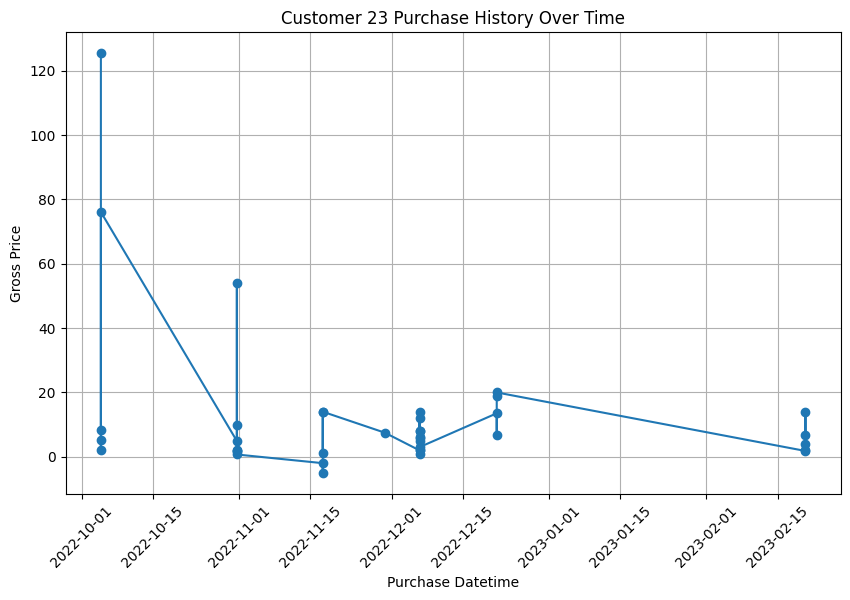

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter data for the specific customer
customer_data = data[data['customer_id'] == 23]

# Convert purchase_datetime to datetime format
customer_data['purchase_datetime'] = pd.to_datetime(customer_data['purchase_datetime'])

# Sort data by purchase_datetime
customer_data = customer_data.sort_values(by='purchase_datetime')

# Plot the purchase history over time
plt.figure(figsize=(10, 6))
plt.plot(customer_data['purchase_datetime'], customer_data['gross_price'], marker='o', linestyle='-')
plt.title('Customer 23 Purchase History Over Time')
plt.xlabel('Purchase Datetime')
plt.ylabel('Gross Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Churn Analysis

In [2]:
from customer_focus_churn_rfm import create_churn_label, create_sliding_window_churn_label, prepare_features, train_churn_model, evaluate_model, identify_high_value_customers
import seaborn as sns

# rfm = create_churn_label(rfm)

churn_label = create_sliding_window_churn_label(data)
churn_label


,customer_id,purchase_datetime,Churn,window_start,window_end
0,30,2022-07-23 07:06:38,0,2022-05-01 07:19:05,2022-07-30 07:19:05
1,76,2022-05-17 16:43:34,0,2022-05-01 07:19:05,2022-07-30 07:19:05
2,86,2022-05-04 12:32:34,0,2022-05-01 07:19:05,2022-07-30 07:19:05
3,146,2022-07-16 07:37:27,0,2022-05-01 07:19:05,2022-07-30 07:19:05
4,194,2022-07-29 19:23:02,0,2022-05-01 07:19:05,2022-07-30 07:19:05
...,...,...,...,...,...
494311,934484,2023-04-30 19:02:11,0,2023-04-26 07:19:05,2023-07-25 07:19:05
494312,934581,2023-04-30 19:35:53,0,2023-04-26 07:19:05,2023-07-25 07:19:05
494313,934620,2023-04-30 19:19:55,0,2023-04-26 07:19:05,2023-07-25 07:19:05
494314,934660,2023-04-30 19:32:17,0,2023-04-26 07:19:05,2023-07-25 07:19:05


In [24]:
# import pandas as pd
# def find_duplicated_entries(data: pd.DataFrame) -> pd.DataFrame:
#     """
#     Find duplicated entries for each customer in the dataset.

#     Parameters
#     ----------
#     data : pd.DataFrame
#         DataFrame containing customer transaction data.

#     Returns
#     -------
#     pd.DataFrame
#         DataFrame with duplicated entries for each customer.
#     """
#     # Check for duplicated entries based on customer_id and purchase_datetime
#     duplicated_entries = data[data.duplicated(subset=['customer_id', 'purchase_datetime'], keep=False)]
    
#     return duplicated_entries

# # Find duplicated entries in the dataset
# duplicated_entries = find_duplicated_entries(data)

# # Display the duplicated entries
# duplicated_entries.head(10)


In [1]:
# TODO: REMOVE
from customer_focus_churn_rfm import load_data
from customer_focus_churn_rfm import create_churn_label, create_sliding_window_churn_label, prepare_features, train_churn_model, evaluate_model, identify_high_value_customers
import seaborn as sns

data = load_data()

# churn_label = create_sliding_window_churn_label(data)


ImportError: cannot import name 'create_churn_label' from 'customer_focus_churn_rfm' (/teamspace/studios/this_studio/marketing_project/customer_focus_churn_rfm.py)

In [2]:
# Find the rows with churn_label and 1 in the Churn column
churned_customers = churn_label[churn_label['Churn'] == 1]

# Display the churned customers
churned_customers


,customer_id,Churn,window_start,window_end,control_end
0,131074,1,2022-05-01 07:19:05,2022-07-30 07:19:05,2022-08-29 07:19:05
2,393221,1,2022-05-01 07:19:05,2022-07-30 07:19:05,2022-08-29 07:19:05
3,393224,1,2022-05-01 07:19:05,2022-07-30 07:19:05,2022-08-29 07:19:05
4,393231,1,2022-05-01 07:19:05,2022-07-30 07:19:05,2022-08-29 07:19:05
5,393236,1,2022-05-01 07:19:05,2022-07-30 07:19:05,2022-08-29 07:19:05
...,...,...,...,...,...
385049,524241,1,2022-12-27 07:19:05,2023-03-27 07:19:05,2023-04-26 07:19:05
385050,393176,1,2022-12-27 07:19:05,2023-03-27 07:19:05,2023-04-26 07:19:05
385052,131040,1,2022-12-27 07:19:05,2023-03-27 07:19:05,2023-04-26 07:19:05
385053,655329,1,2022-12-27 07:19:05,2023-03-27 07:19:05,2023-04-26 07:19:05


In [3]:
# Find the customer_id equals to 23 in the churn_label DataFrame
customer_23_data = churn_label[churn_label['customer_id'] == 23]

# Display the data for customer_id 23
customer_23_data


,customer_id,Churn,window_start,window_end,control_end
110719,23,0,2022-07-30 07:19:05,2022-10-28 07:19:05,2022-11-27 07:19:05
152420,23,0,2022-08-29 07:19:05,2022-11-27 07:19:05,2022-12-27 07:19:05
198797,23,1,2022-09-28 07:19:05,2022-12-27 07:19:05,2023-01-26 07:19:05
246048,23,0,2022-10-28 07:19:05,2023-01-26 07:19:05,2023-02-25 07:19:05
293611,23,1,2022-11-27 07:19:05,2023-02-25 07:19:05,2023-03-27 07:19:05
339040,23,1,2022-12-27 07:19:05,2023-03-27 07:19:05,2023-04-26 07:19:05


In [4]:
# Show purchase_datetime, customer_id, and product_id for customer_id equals to 30
customer_30_purchases = data[data['customer_id'] == 23][['purchase_datetime', 'customer_id', 'product_id']]

# Display the selected columns for customer_id 30
customer_30_purchases


,purchase_datetime,customer_id,product_id
0,2022-10-04 18:28:51,23,35551922
1,2022-10-04 18:28:51,23,30344384
2,2022-10-04 18:28:51,23,33794292
3,2022-10-04 18:28:51,23,33795776
4,2022-10-04 18:28:51,23,36235381
5,2022-10-31 13:07:42,23,35002296
6,2022-10-31 13:07:42,23,32157580
7,2022-10-31 13:07:42,23,35930902
8,2022-10-31 13:07:42,23,81268736
9,2022-10-31 13:07:42,23,35930965


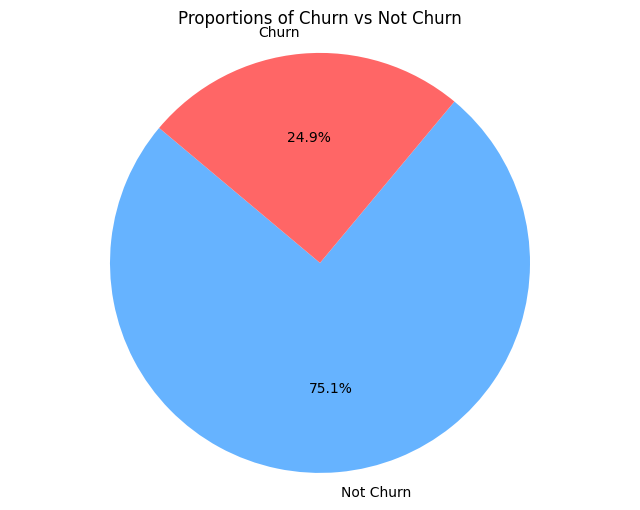

In [5]:
import matplotlib.pyplot as plt
# Plot the proportions between churn and not churn

# Calculate the proportions
churn_proportions = churn_label['Churn'].value_counts(normalize=True)

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(churn_proportions, labels=['Not Churn', 'Churn'], autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff6666'])
plt.title('Proportions of Churn vs Not Churn')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Display the chart
plt.show()


In [1]:

from sklearn.preprocessing import StandardScaler
from customer_focus_churn_rfm import create_sliding_window_churn_label, prepare_features, train_churn_model, evaluate_model, identify_high_value_customers, load_data

print("Loading data...")
data = load_data()

print("Creating sliding window churn labels...")
# Create sliding window churn labels
churn_labels = create_sliding_window_churn_label(data)


print("Preparing features...")
# Prepare features
features_df = prepare_features(data, churn_labels)

print("Training model...")
# Train the model
model, feature_names, (X_train, X_test, y_train, y_test) = train_churn_model(features_df)


Loading data...
Creating sliding window churn labels...
Preparing features...
Training model...


In [2]:
print("Evaluating the model...")
# Evaluate the model
evaluation_results = evaluate_model(model, X_test, y_test)

print("Identifying high-value customers at risk of churning...")
# Identify high-value customers at risk of churning
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
high_value_at_risk = identify_high_value_customers(features_df, model, feature_names, scaler)

Evaluating the model...


Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.20      0.27     19209
           1       0.77      0.90      0.83     57802

    accuracy                           0.72     77011
   macro avg       0.58      0.55      0.55     77011
weighted avg       0.68      0.72      0.69     77011


Confusion Matrix:
[[ 3900 15309]
 [ 5930 51872]]

ROC AUC Score: 0.6117
Identifying high-value customers at risk of churning...


/home/zeus/miniconda3/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


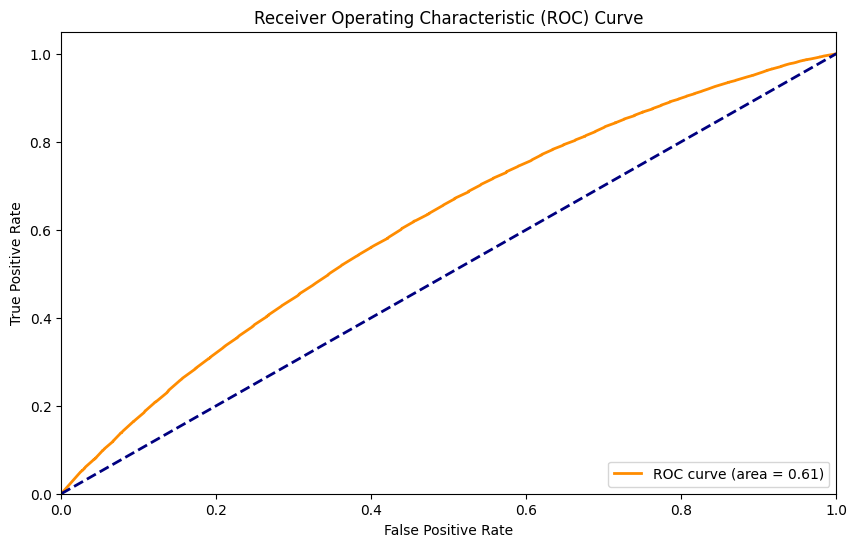

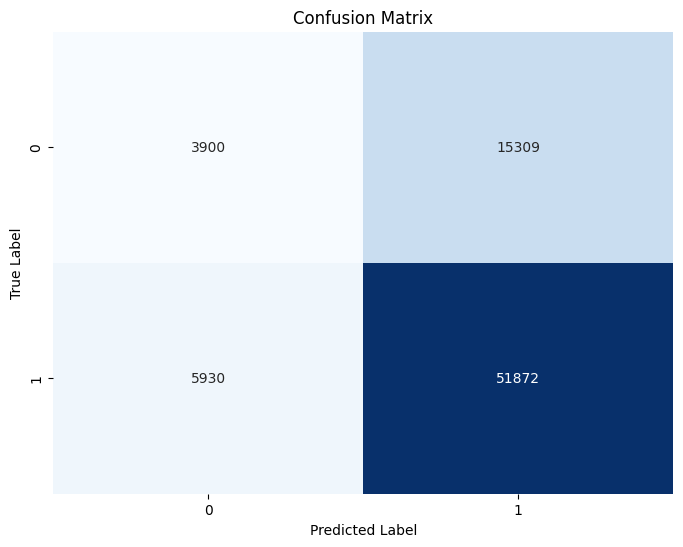

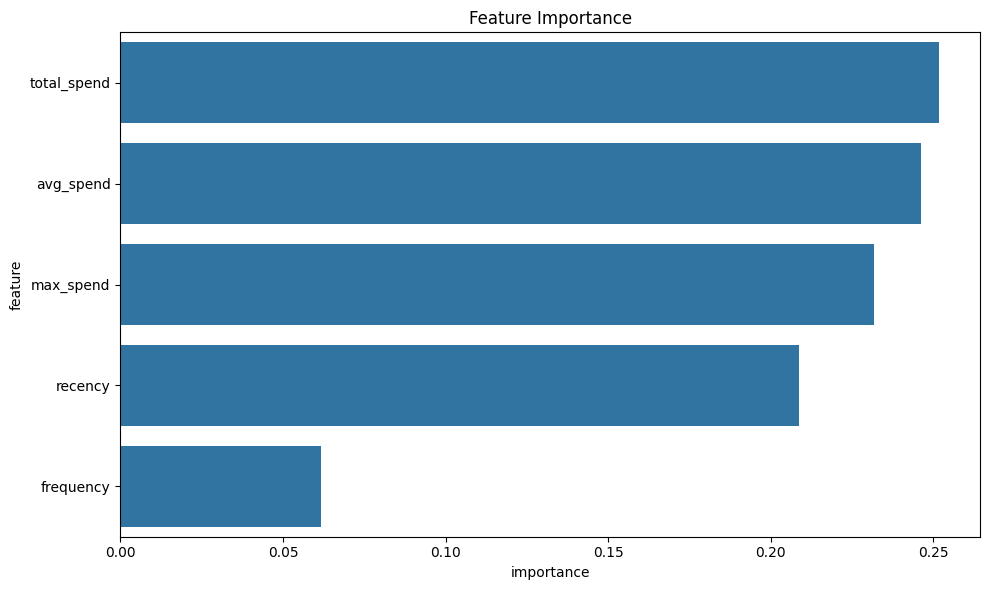

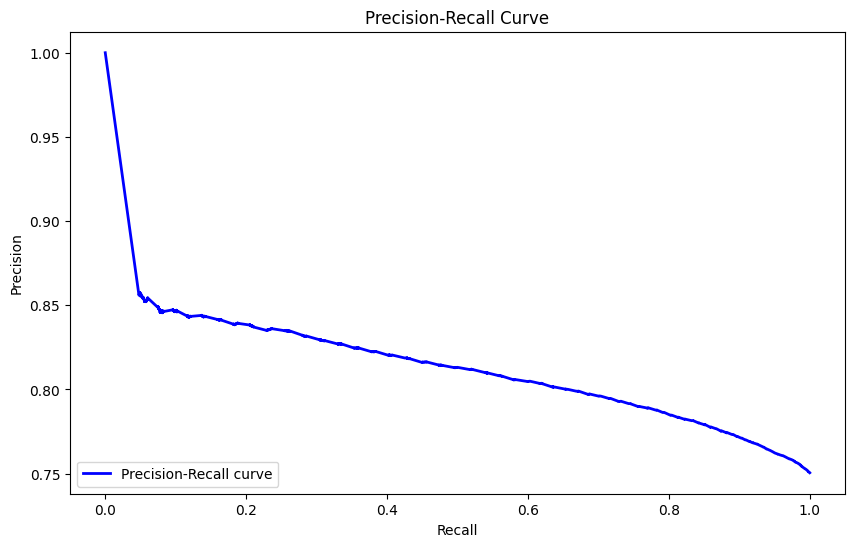

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import pandas as pd

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
conf_matrix = evaluation_results['confusion_matrix']
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Plot Feature Importance
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(10, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
